In [1]:
import sys
import os
sys.path.append(os.environ.get('NOTEBOOK_ROOT'))

import pandas as pd
import seaborn as sns

from matplotlib import pyplot
from utils.data_cube_utilities import dc_display_map


%matplotlib inline

### Load Truth Data

Our uruguay data comes in a csv format. It contains three attributes:  

- *latitude*
- *longitude*
- *landcover class*

In [2]:
df = pd.read_csv('../data.csv')
df.head()

,X,Y,LandUse,Latitude,Longitude
0,618522.8899,6218452.029,Forestry,-34.168155,-55.714061
1,649042.3861,6199719.402,Forestry,-34.333113,-55.379803
2,655993.6095,6200009.045,Forestry,-34.329479,-55.304319
3,656440.0958,6200236.666,Forestry,-34.327360,-55.299509
4,656825.7859,6199755.161,Forestry,-34.331642,-55.295231


### Label distribution
In this section, data is binned by landcover and counted. Landcover classes with little to no labels will be unreliable candidates for classification as there may not be enough variance in the training labels to guarantee that the model learns to generalize. 

In [3]:
df.groupby("LandUse").size()

LandUse
Forestry              6
Fruittrees            3
Nativeforest         13
Naturalgrassland    175
Other                 8
Prairie              59
Stubble               9
Summercrops         150
Water                 1
dtype: int64

<AxesSubplot:xlabel='LandUse', ylabel='count'>

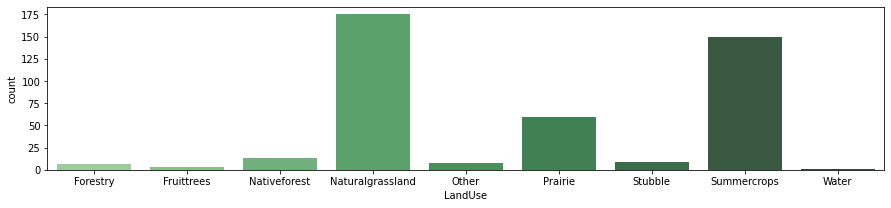

In [4]:
fig, ax = pyplot.subplots(figsize=(15,3))
sns.countplot(x="LandUse",data=df, palette="Greens_d");

### Re-Labeling 
Related classes are combined to boost the number of samples in the new classes.  

In [5]:
df_new = df.copy()  
df_new['LandUse'].update(df_new['LandUse'].map(lambda x: "Forest" if x in ["Forestry","Fruittrees","Nativeforest"] else x ))
df_new['LandUse'].update(df_new['LandUse'].map(lambda x: "Misc" if x  not in ["Forest","Prairie","Summercrops","Naturalgrassland"] else x ))

In [6]:
df_new.groupby("LandUse").size()

LandUse
Forest               22
Misc                 18
Naturalgrassland    175
Prairie              59
Summercrops         150
dtype: int64

<AxesSubplot:xlabel='LandUse', ylabel='count'>

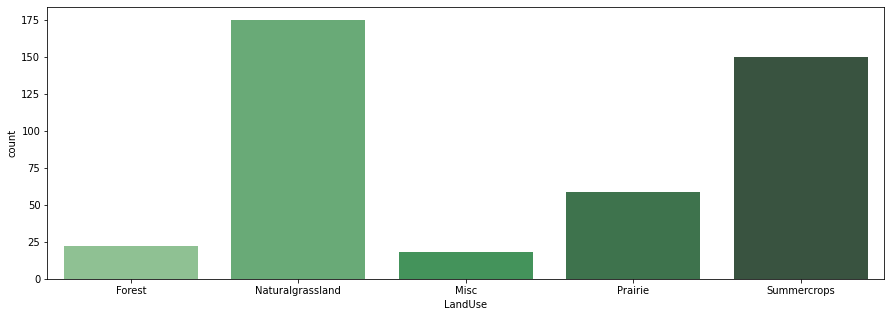

In [7]:
fig, ax = pyplot.subplots(figsize=(15,5))
sns.countplot(x="LandUse",data=df_new, palette="Greens_d");

### Visualize Label Distribution

In [8]:
dc_display_map.display_grouped_pandas_rows_as_pins(df_new, group_name= "LandUse")

### Export re-labled data

In [9]:
output_destination_name = "./relabeled_data.csv"

In [10]:
## Recap of structure
df_new.head()

,X,Y,LandUse,Latitude,Longitude
0,618522.8899,6218452.029,Forest,-34.168155,-55.714061
1,649042.3861,6199719.402,Forest,-34.333113,-55.379803
2,655993.6095,6200009.045,Forest,-34.329479,-55.304319
3,656440.0958,6200236.666,Forest,-34.327360,-55.299509
4,656825.7859,6199755.161,Forest,-34.331642,-55.295231


In [11]:
df_new.to_csv(output_destination_name)

In [12]:
!ls

'1. Data Exploration.ipynb'		    classifiers
'2. Feature Engineering.ipynb'		    engineered_features.csv
'3. Model Building and Evaluation.ipynb'    engineered_features_original.csv
'4. Display and Package Classifier.ipynb'   feature_engineering.PNG
 README.md				    relabeled_data.csv
 __init__.py
